In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
data = pd.read_csv('gtc.csv',encoding='ISO-8859-1')

C:\Users\hemil\AppData\Local\Temp\ipykernel_2140\1133457915.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('gtc.csv',encoding='ISO-8859-1')


In [187]:
print(data.head(10))

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   
5  197001010002   1970       1     1        NaN         0        NaN      217   
6  197001020001   1970       1     2        NaN         0        NaN      218   
7  197001020002   1970       1     2        NaN         0        NaN      217   
8  197001020003   1970       1     2        NaN         0        NaN      217   
9  197001030001   1970       1     3        NaN         0        NaN      217   

          country_txt  region  ...  \
0  Dominican Republic       2  ...   
1              Mexico       1  .

In [188]:
data.shape

(181691, 135)

In [189]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


In [190]:
print(data.corr())

C:\Users\hemil\AppData\Local\Temp\ipykernel_2140\3359323643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


            eventid     iyear    imonth      iday  extended   country  \
eventid    1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear      0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth     0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday       0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended   0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
...             ...       ...       ...       ...       ...       ...   
nreleased -0.181612 -0.181556 -0.011535  0.001765 -0.192155 -0.044331   
INT_LOG   -0.143600 -0.143601 -0.002302 -0.001540  0.071768  0.069904   
INT_IDEO  -0.133252 -0.133253 -0.002034 -0.001621  0.075147  0.067564   
INT_MISC  -0.077852 -0.077847 -0.002554 -0.002027  0.027335  0.207281   
INT_ANY   -0.175605 -0.175596 -0.006336 -0.001199  0.080767  0.153118   

             region  latitude  longitude  specificity  ...  ransomamt  \
eventid    0.401371  0.166886   0.003907     0.030

In [191]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [192]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Targeted','nkill':'No.of.Kill','nwound':'No.of.Wounded','gname':'Gang','targtype1_txt':
    'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [193]:
data = data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','No.of.Kill','No.of.Wounded','Targeted','Gang','Target_type','Weapon_type','Motive']]

In [194]:
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,No.of.Kill,No.of.Wounded,Targeted,Gang,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [195]:
data.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
State               421
Region                0
city                434
latitude           4556
longitude          4557
AttackType            0
No.of.Kill        10313
No.of.Wounded     16311
Targeted            636
Gang                  0
Target_type           0
Weapon_type           0
Motive           131130
dtype: int64

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   State          181270 non-null  object 
 5   Region         181691 non-null  object 
 6   city           181257 non-null  object 
 7   latitude       177135 non-null  float64
 8   longitude      177134 non-null  float64
 9   AttackType     181691 non-null  object 
 10  No.of.Kill     171378 non-null  float64
 11  No.of.Wounded  165380 non-null  float64
 12  Targeted       181055 non-null  object 
 13  Gang           181691 non-null  object 
 14  Target_type    181691 non-null  object 
 15  Weapon_type    181691 non-null  object 
 16  Motive         50561 non-null   object 
dtypes: float64(4), int64(3), obje

In [197]:
#Most Attacked Country

print("Most Attacked Country : ",data['Country'].value_counts().idxmax())

Most Attacked Country :  Iraq


In [198]:
# Most Attacked city
print("Most Attacked City : ",data['city'].value_counts().index[1])

Most Attacked City :  Baghdad


In [199]:
# Most Attacked Region
print("Most Attacked Region : ",data['Region'].value_counts().idxmax())

Most Attacked Region :  Middle East & North Africa


In [200]:
# Most Attacking Gang
print("Most Attacking Gang : ",data['Gang'].value_counts().index[1])

Most Attacking Gang :  Taliban


In [201]:
Killdata = data.loc[:,'No.of.Kill']
# print(Killdata)
print('Number of people killed by terror attack : ',int(sum(Killdata.dropna())))

Number of people killed by terror attack :  411868


In [202]:
countrydata = data.loc[:,'Country']
countrykilldata = pd.concat([countrydata,Killdata],axis=1)
countrykilldata

,Country,No.of.Kill
0,Dominican Republic,1.0
1,Mexico,0.0
2,Philippines,1.0
3,Greece,NaN
4,Japan,NaN
...,...,...
181686,Somalia,1.0
181687,Syria,2.0
181688,Philippines,0.0
181689,India,0.0


In [203]:
countrykilldatatable = countrykilldata.pivot_table(columns='Country',values='No.of.Kill',aggfunc='sum')
countrykilldatatable

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
No.of.Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


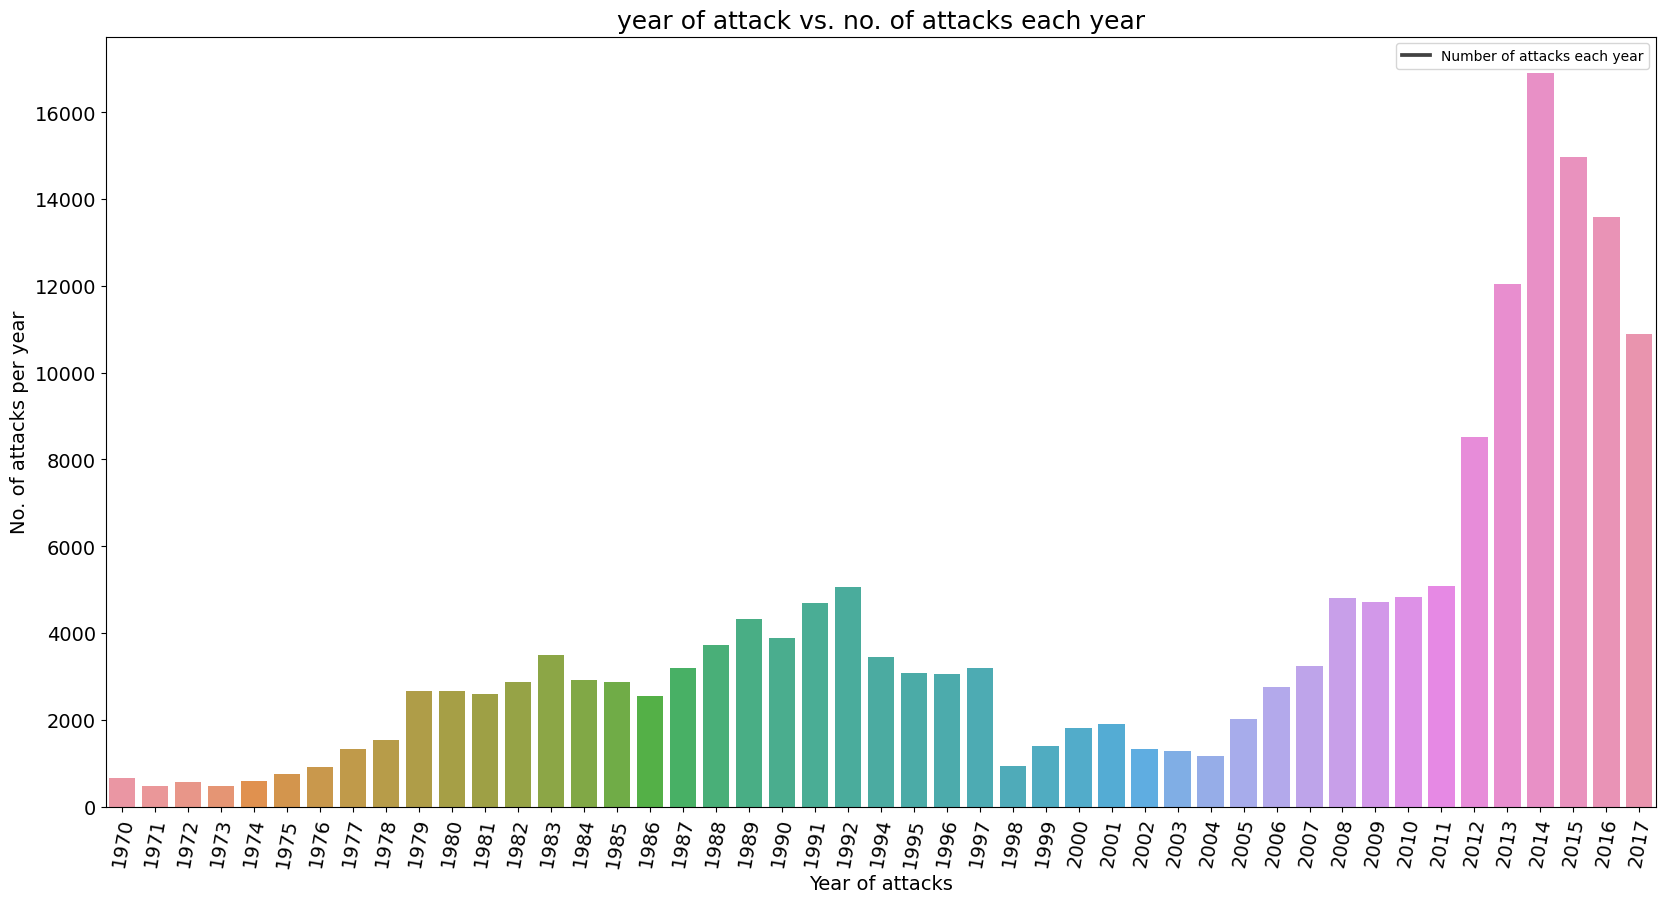

In [204]:
X = data['Year'].unique()
# print(X)
Y = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x=X,y=Y)
plt.xticks(fontsize=14,rotation=80)
plt.yticks(fontsize=14)
plt.xlabel('Year of attacks',fontsize=14)
plt.ylabel('No. of attacks per year',fontsize=14)
plt.legend(labels = ['Number of attacks each year'])
plt.title('year of attack vs. no. of attacks each year',fontsize=18)
plt.show()


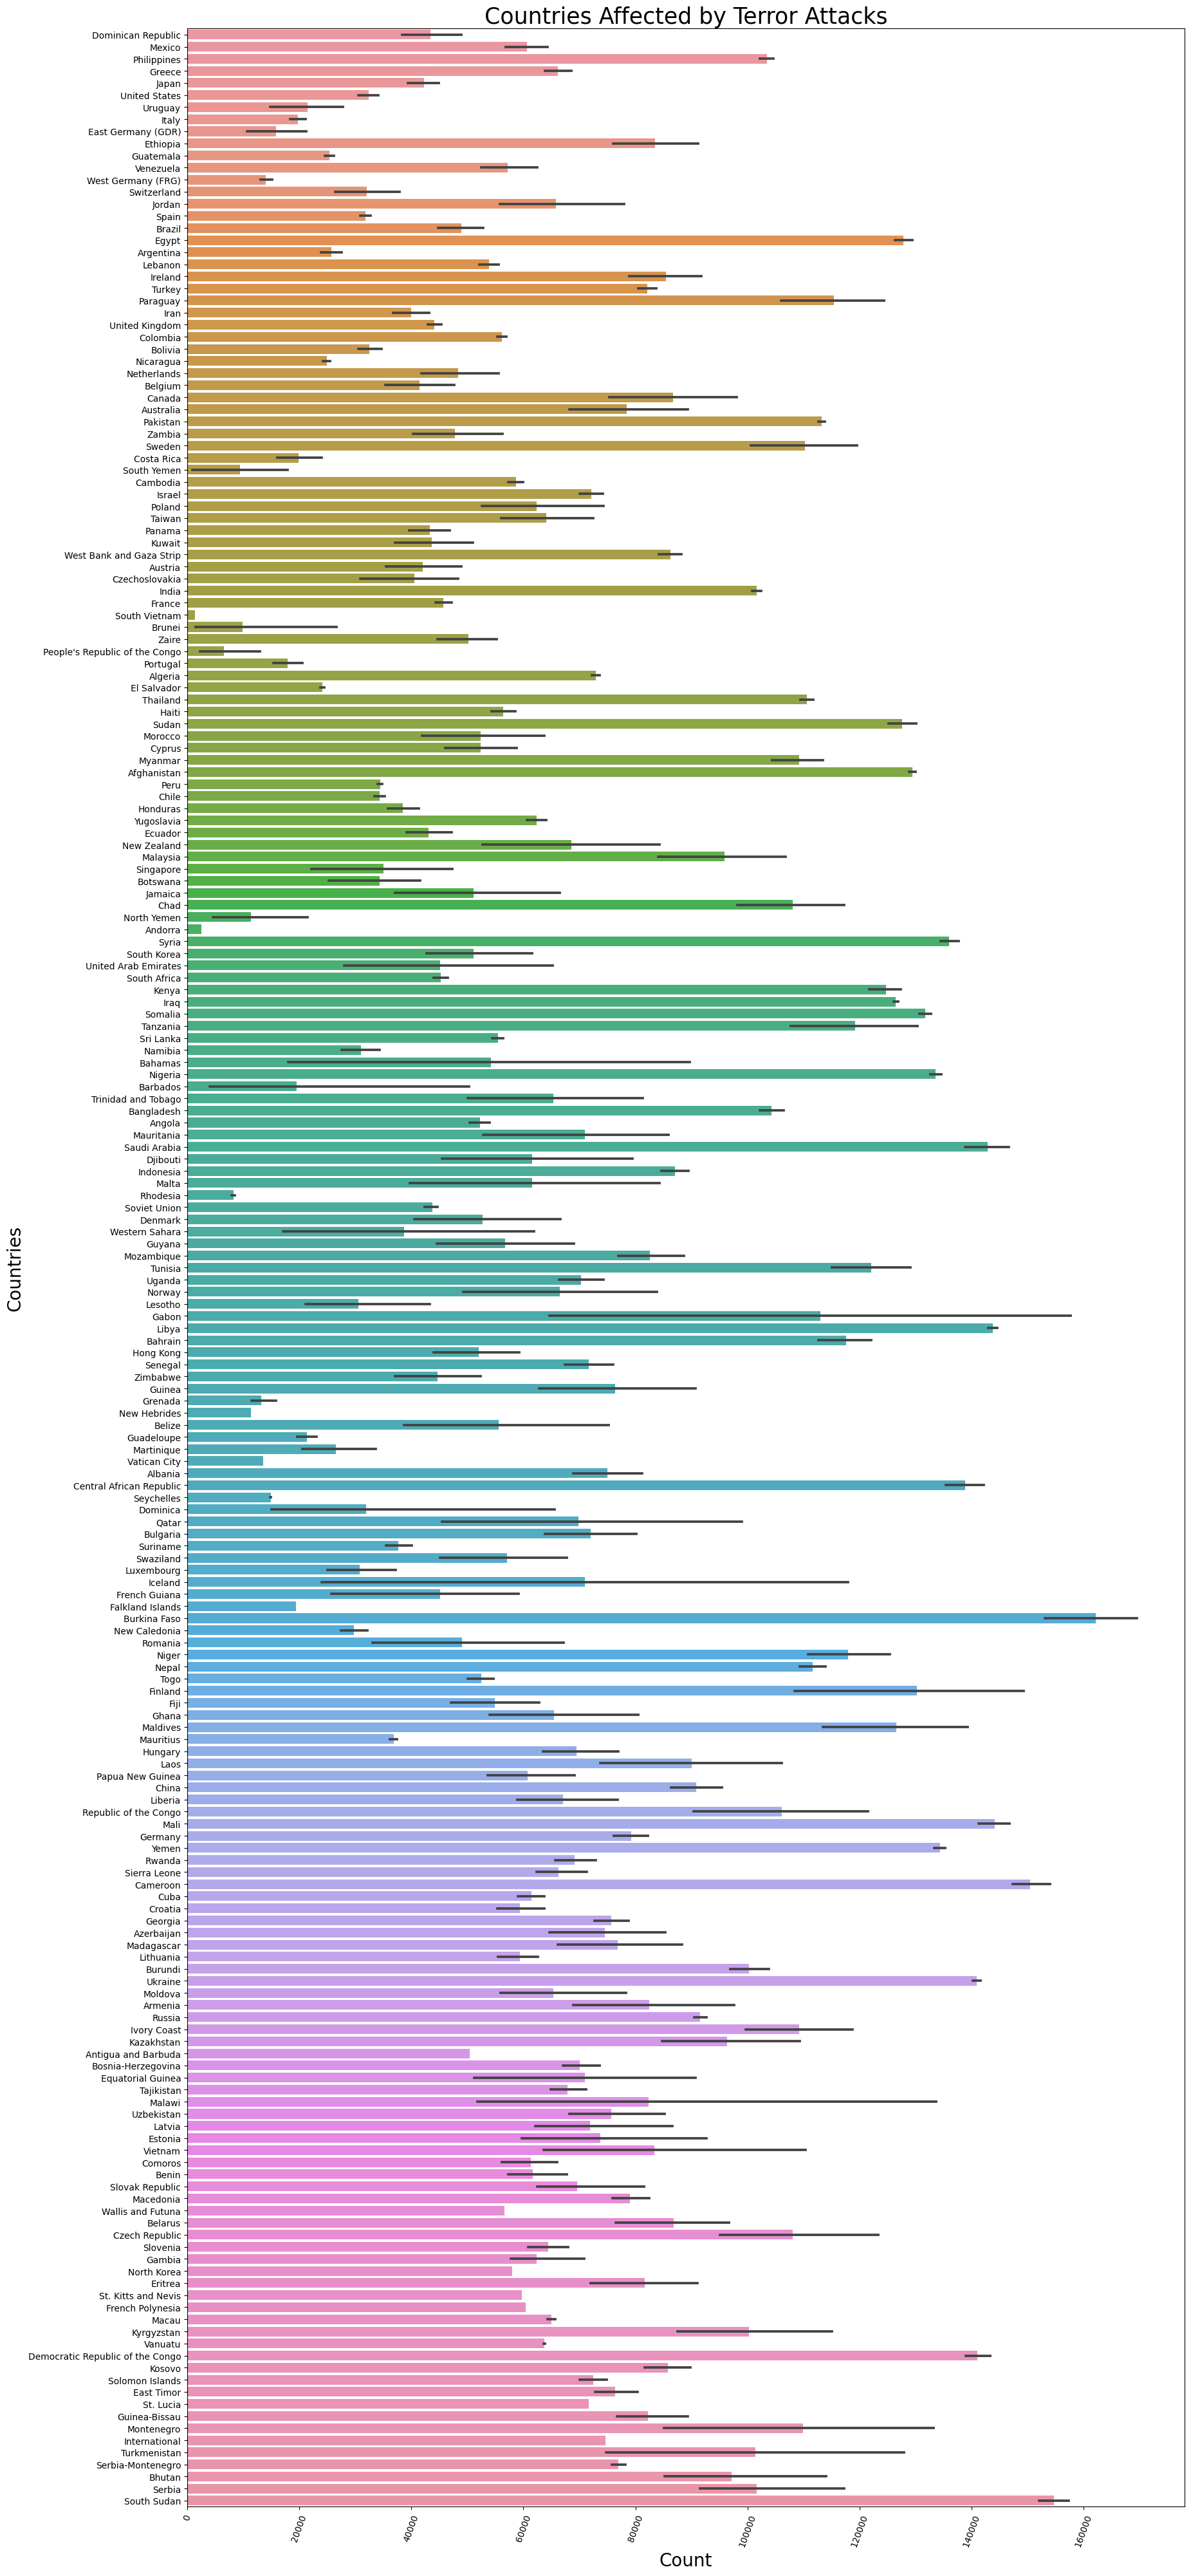

In [205]:
plt.subplots(figsize=(20,50))
sns.barplot(x=data['Country'].index,y=data['Country'].values)
plt.title('Countries Affected by Terror Attacks',fontsize=25)
plt.ylabel('Countries',fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.xticks(rotation=70)
plt.yticks()
plt.show()


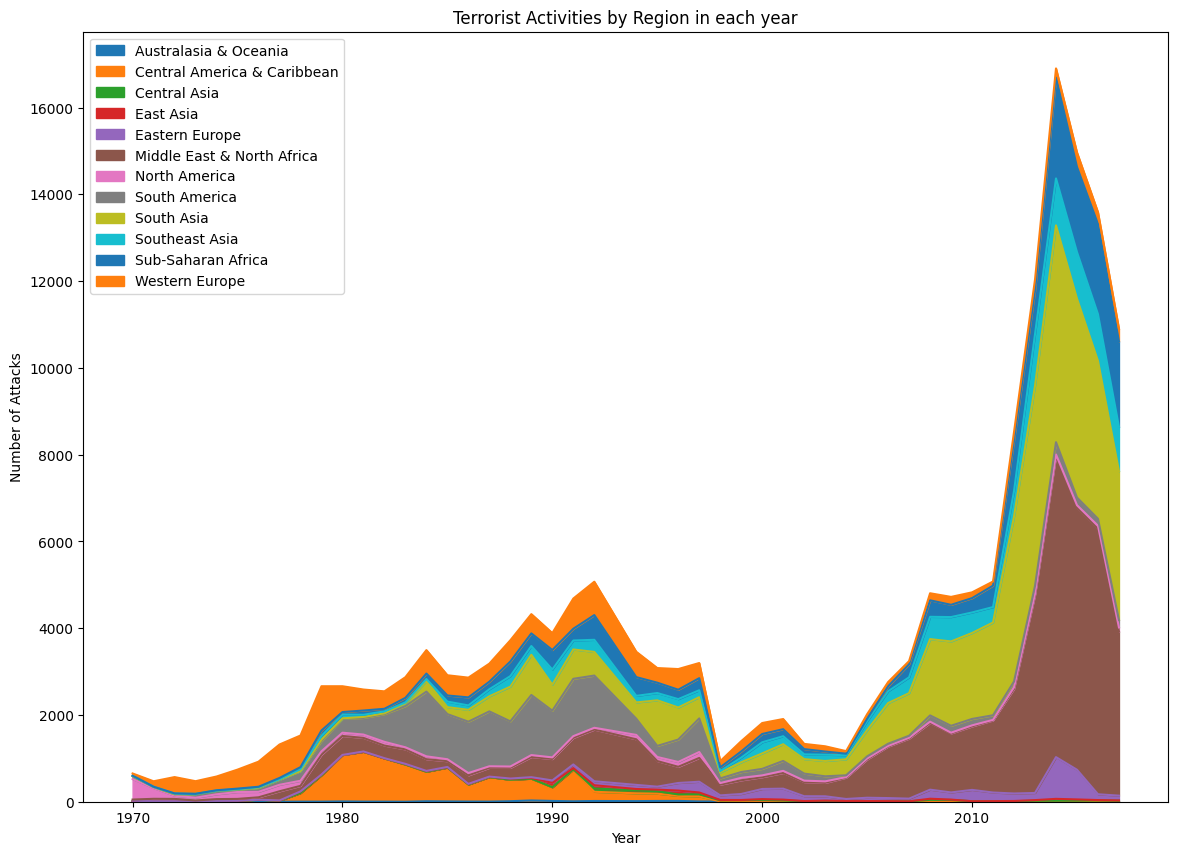

In [206]:
pd.crosstab(data.Year, data.Region).plot(kind="area",figsize=(14,10))
# print(pd.crosstab(data.Year, data.Region))

plt.legend()
plt.title('Terrorist Activities by Region in each year')
plt.ylabel('Number of Attacks')
plt.show()

In [207]:
data.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

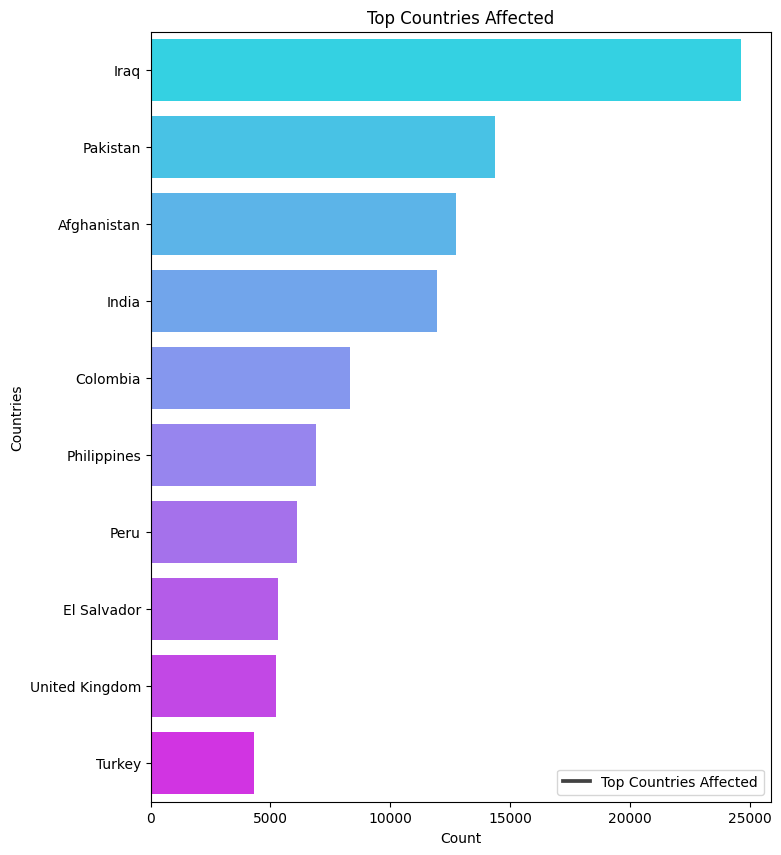

In [208]:
plt.subplots(figsize=(8,10))
A = data['Country'].value_counts()[:10].values
B = data['Country'].value_counts()[:10].index
sns.barplot(x=A, y=B, palette='cool')
plt.title('Top Countries Affected')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.legend(labels=['Top Countries Affected'])
plt.xticks(rotation=0)
plt.show()

In [209]:
print(data.Gang.value_counts()[:5])
print()
print(data.Gang.value_counts()[1:10])

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Gang, dtype: int64

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Gang, dtype: int64


In [210]:
print(data['Gang'].isin(['Taliban']))
Gang_in_Most1 = data[data['Gang'].isin(['Taliban'])]
Gang_in_Most1['Country'].unique()

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Name: Gang, Length: 181691, dtype: bool


array(['Afghanistan', 'Pakistan', 'Turkmenistan'], dtype=object)

In [211]:
Gang_in_Most1['Region'].unique()

array(['South Asia', 'Central Asia'], dtype=object)

In [212]:
Gang_in_Most1['city'].unique()[1:5]

array(['Kandahar', 'Kabul', 'Yakawlang', 'Khodja Baha ud din'],
      dtype=object)

In [213]:
Gang_in_Most2 = data[data['Gang'].isin(['Islamic State of Iraq and the Levant (ISIL)'])]
Gang_in_Most2['Country'].unique()

array(['Syria', 'Iraq', 'Turkey', 'Tunisia', 'Lebanon', 'Israel',
       'Belgium', 'Egypt', 'Libya', 'Saudi Arabia',
       'West Bank and Gaza Strip', 'France', 'Bahrain', 'Jordan',
       'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [214]:
Gang_in_Most2['Region'].unique()

array(['Middle East & North Africa', 'Western Europe',
       'Sub-Saharan Africa', 'Southeast Asia', 'Eastern Europe',
       'Central Asia', 'Australasia & Oceania'], dtype=object)

In [215]:
Gang_in_Most2['city'].unique()

array(['Atmeh', 'Baghdad', 'Latifiyah', 'Mahmudiyah', 'Samarra',
       'Reyhanli', 'Mosul', 'Unknown', 'Madain', 'Jisr Diyala',
       'Saba al-Bor', 'Tal Afar', 'Taji', 'Karma', 'Al-Jadidah',
       'Himreen', 'Al-Adheim', 'Jabalah', 'Kut', 'Basra', 'Nasiriyah',
       'Najaf', 'Tuz Khormato', 'Mahawil', 'Arbil', 'Shirqat', 'Fallujah',
       'Hadhar', 'Athba', 'Nahrawan', 'Tikrit', 'Dujail', 'Sabboura',
       'Muqdadiyah', 'Baqubah', 'Abu Ghraib', 'Amarah', 'Samawah',
       'Jurf al-Sakhar', 'Karbala', 'Musayyib', 'Baiji', 'Sulayman Beg',
       'Tunis', 'Damascus', 'Rabia', 'Anah', 'Yathrib',
       'Amiriyat Al-Fallujah', 'Raqqah', 'Qamishli', 'Aleppo',
       'Mannagh Air Base', 'Husseiniyah', 'Al-Zubeidiyah', 'Kirkuk',
       'Al-Madaen', 'Tarmiyah', 'Sejou', 'Hamah', 'Hillah',
       'Iskandariyah', 'Al-Debis', 'Buhriz', 'Tal Abyad', 'Hawijah',
       'Qabak', 'Hawijah district', 'Saraqib', 'Mandali', 'Abu Sayda',
       'Alam', 'Diwaniyah', 'Nabak', 'Deir Attiyeh', 'Siniyah'

In [217]:
Gang_in_Most3 = data[data['Gang'].isin(['Shining Path (SL)'])]
Gang_in_Most3['Country'].unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico'],
      dtype=object)

In [218]:
Gang_in_Most3['Region'].unique()

array(['South America', 'North America'], dtype=object)

In [219]:
Gang_in_Most3['city'].unique()

array(['Ayacucho', 'Uchuraccay', 'Huaraz', 'Tarma', 'Talma', 'Cusco',
       'Cusco district', 'Huancavelica district', 'Chilca',
       'La Voz de Ayachucho', 'Mujillo', 'Lima', 'Unknown',
       'Huancavelica', 'Paipa', 'Huancayo', 'Sicuani', 'Acos District',
       'Yauli', 'Cutervo', 'Chimbote', 'Iquitos', 'Trujillo',
       'Sicuani district', 'Lurigancho', 'Ilo', 'Arequipa',
       'Villa Maria del Triunfo', 'Chiclayo', 'ILO', 'Cajamarca',
       'Villa El Salvador', 'Huanta', 'Quinua', 'Tacna', 'Mantaro',
       'Cerro de Pasco', 'Huacho', 'Huancayo district', 'Abancay',
       'Vinchos', 'Vivichos', 'ICA', 'Huarochiri', 'Cachi-Cachi',
       'Quillabamba', 'Azangaro', 'Chunta', 'Oyon',
       'Vilcashuaman district', 'Vilcashuaman', 'Marcabal', 'Concepcion',
       'Chumbes', 'Cajamarquilla', 'Jauja', 'Huambalpa', 'Oroya',
       'Chupaca', 'Tambo', 'Acos Vinchos', 'Chacari', 'Ayacucho district',
       'San Martin de Paras district', 'Jaen', 'Sequeslambra',
       'Chaupimarca

In [ ]:
attacktype = data.loc[:,'AttackType']
type_kill_data = pd.concat([attacktype,Killdata],axis=1)


In [ ]:
kill_attacktype = type_kill_data.pivot_table(columns='AttackType', values='No.of.Kill',aggfunc='sum')
kill_attacktype

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
No.of.Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown']
                                     No.of.Kill
AttackType                                     
Armed Assault                          160297.0
Assassination                           24920.0
Bombing/Explosion                      157321.0
Facility/Infrastructure Attack           3642.0
Hijacking                                3718.0
Hostage Taking (Barricade Incident)      4478.0
Hostage Taking (Kidnapping)             24231.0
Unarmed Assault                           880.0
Unknown                                 32381.0
[[160297.0], [24920.0], [157321.0], [3642.0], [3718.0], [4478.0], [24231.0], [880.0], [32381.0]]


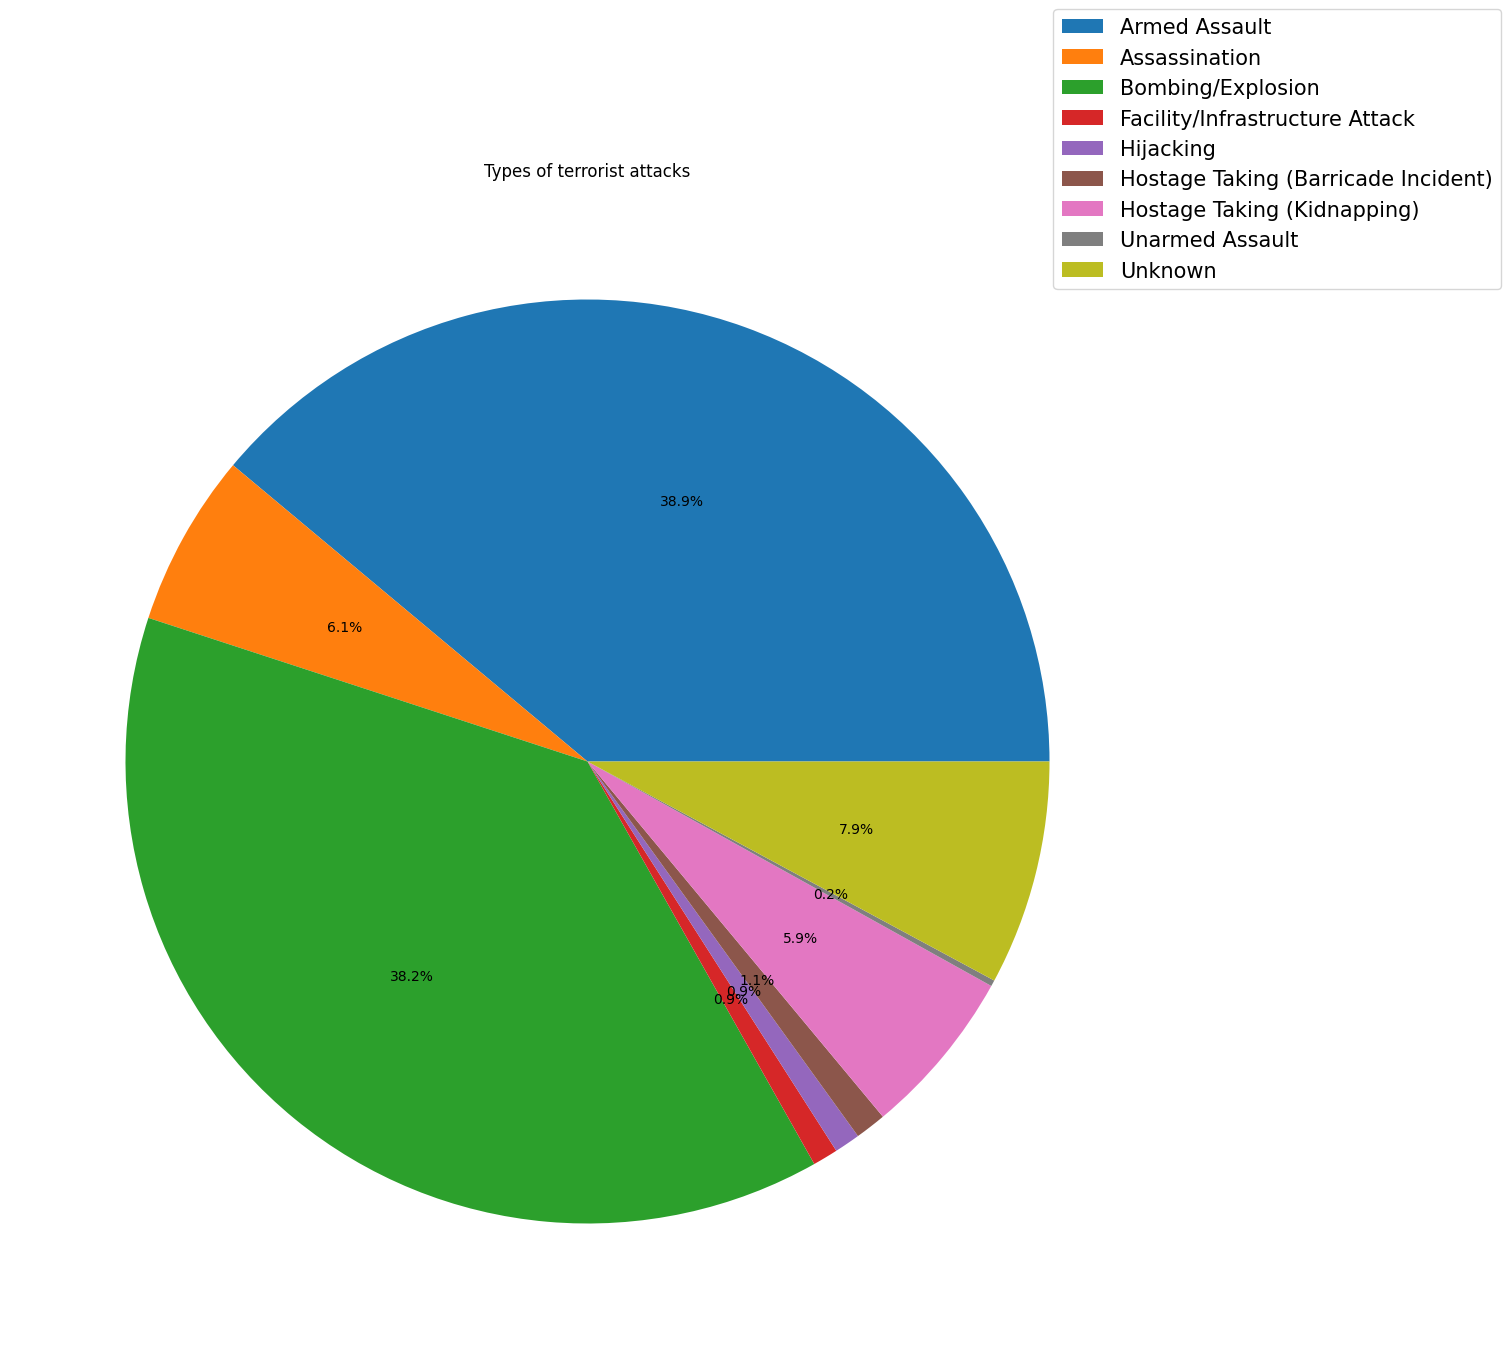

In [ ]:
labels = kill_attacktype.columns.tolist() # convert line to list
print(labels)
transpoze = kill_attacktype.T # transpoze
print(transpoze)
T_values = transpoze.values.tolist()
T_values_1d = [value for sublist in T_values for value in sublist] # to convert 2d list into 1d list.
print(T_values)
fig , axe = plt.subplots(figsize=(15,15), subplot_kw=dict(aspect='equal'))
plt.pie(T_values_1d, startangle=360,autopct='%.1f%%')
plt.title('Types of terrorist attacks')
plt.legend(labels, loc='lower right', bbox_to_anchor = (1.3,0.9), fontsize=15) # location legend
plt.show() 

Most Attack Type: Armed Assault, Bombing/Explosion, Assassination

Most Attacking Gang : Taliban, Islamic State of Iraq and the Levant (ISIL) & Shining Path(SL)

CONCLUSION:

Top Attacked Region : Middle East & North Africa (On the Basis of Gang Attack, Both Taliban & ISIL Attacked this Region).

Top City Attacked : Baghdad(Capital of Iraq)

Top Affected Countries: Iraq, Afghanistan, Pakistan, India, Colombia.